In [1]:
from PionDecaySim import PionDecaySim
import numpy as np

In [2]:
decay = PionDecaySim(10000, 1000.0, 100.0)
pions = decay.pion_decay_lab_frame()
muon_momentum_rest, nu_momentum_rest = decay.after_decay_particles_rest_frame()

In [3]:
muons_lab, neutrinos_lab = [], []
for i in range(decay.n_particles):
    muon = decay.after_decay_particles_lab_frame(muon_momentum_rest[i], 
                                 decay.MUON_MASS, 
                                 pions[i])
    nu = decay.after_decay_particles_lab_frame(nu_momentum_rest[i],
                               0,
                               pions[i])
    muons_lab.append(muon)
    neutrinos_lab.append(nu)

In [4]:
def analyze_results(muons):
    """Analyze and plot results of the simulation"""
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Extract muon momentum and energies
    momentum = np.array([np.linalg.norm(muon.momentum) for muon in muons])
    energies = np.array([muon.energy for muon in muons])
    angles_x = np.array([np.arccos(muon.momentum[0]/np.linalg.norm(muon.momentum)) 
                      for muon in muons])
    angles_y = np.array([np.arccos(muon.momentum[1]/np.linalg.norm(muon.momentum)) 
                      for muon in muons])
    angles_z = np.array([np.arccos(muon.momentum[2]/np.linalg.norm(muon.momentum)) 
                      for muon in muons])
    
    # Print summary statistics
    print(f"Muon momentum: mean = {np.mean(momentum):.2f} MeV/c, "
          f"std = {np.std(momentum):.2f} MeV/c")
    print(f"Muon energy: mean = {np.mean(energies):.2f} MeV, "
          f"std = {np.std(energies):.2f} MeV")
    print(f"Muon angle x: mean = {np.rad2deg(np.mean(angles_x)):.2f}°, "
          f"std = {np.rad2deg(np.std(angles_x)):.2f}°")
    print(f"Muon angle y: mean = {np.rad2deg(np.mean(angles_y)):.2f}°, "
          f"std = {np.rad2deg(np.std(angles_y)):.2f}°")
    print(f"Muon angle z: mean = {np.rad2deg(np.mean(angles_z)):.2f}°, "
          f"std = {np.rad2deg(np.std(angles_z)):.2f}°")
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Momentum distribution
    ax1 = fig.add_subplot(221)
    mean, std = np.mean(momentum), np.std(momentum)
    ax1.hist(momentum, bins=50, histtype='bar', color='darkblue', label=f"\n$\\mathbf{{Mean}}$ = {mean:.2f}\n$\\mathbf{{Std}}$ = {std:.2f}")
    ax1.set_xlabel('Momentum (MeV/c)', fontsize=20)
    ax1.set_ylabel('Counts', fontsize=20)
    ax1.set_title('Muon Momentum Distribution - lab frame', fontsize=20)
    ax1.grid(True)
    leg = ax1.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), 
                      fontsize='small', title=f'$\\mathbf{{Summary}}$', title_fontsize='medium')
    leg.get_title().set_fontweight('bold')
    leg._legend_box.align = "center"
    
    # 2. Energy distribution
    ax2 = fig.add_subplot(222)
    mean, std = np.mean(energies), np.std(energies)
    ax2.hist(energies, bins=50, histtype='bar', color='brown', label=f"\n$\\mathbf{{Mean}}$ = {mean:.2f}\n$\\mathbf{{Std}}$ = {std:.2f}")
    ax2.set_xlabel('Energy (MeV)', fontsize=20)
    ax2.set_ylabel('Counts', fontsize=20)
    ax2.set_title('Muon Energy Distribution - lab frame', fontsize=20)
    ax2.grid(True)
    leg = ax2.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), 
                      fontsize='small', title=f'$\\mathbf{{Summary}}$', title_fontsize='medium')
    leg.get_title().set_fontweight('bold')
    leg._legend_box.align = "center"
    
    # 3. Angular distribution x
    ax3 = fig.add_subplot(223)
    mean, std = np.rad2deg(np.mean(angles_x)), np.rad2deg(np.std(angles_x))
    ax3.hist(np.rad2deg(angles_x), bins=50, histtype='bar', color='darkgreen', label=f"\n$\\mathbf{{Mean}}$ = {mean:.2f}\n$\\mathbf{{Std}}$ = {std:.2f}")
    ax3.set_xlabel('Angle (degrees)', fontsize=20)
    ax3.set_ylabel('Counts', fontsize=20)
    ax3.set_title('Muon Angular Distribution in x - lab frame', fontsize=20)
    ax3.grid(True)
    leg = ax3.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), 
                      fontsize='small', title=f'$\\mathbf{{Summary}}$', title_fontsize='medium')
    leg.get_title().set_fontweight('bold')
    leg._legend_box.align = "center"
    
    # 4. Add momentum-energy correlation plot
    ax5 = fig.add_subplot(224)
    ax5.scatter(momentum, energies, color='black', alpha=0.1, s=1)
    ax5.set_xlabel('Momentum (MeV/c)', fontsize=20)
    ax5.set_ylabel('Energy (MeV)', fontsize=20)
    ax5.set_title('Muon Energy vs Momentum - lab frame', fontsize=20)
    ax5.grid(True)
    
    # Make plots tight and show
    plt.tight_layout()
    plt.show()

Muon momentum: mean = 788.54 MeV/c, std = 149.56 MeV/c
Muon energy: mean = 795.85 MeV, std = 148.17 MeV
Muon angle x: mean = 1.74°, std = 0.56°
Muon angle y: mean = 89.99°, std = 1.30°
Muon angle z: mean = 90.00°, std = 1.29°


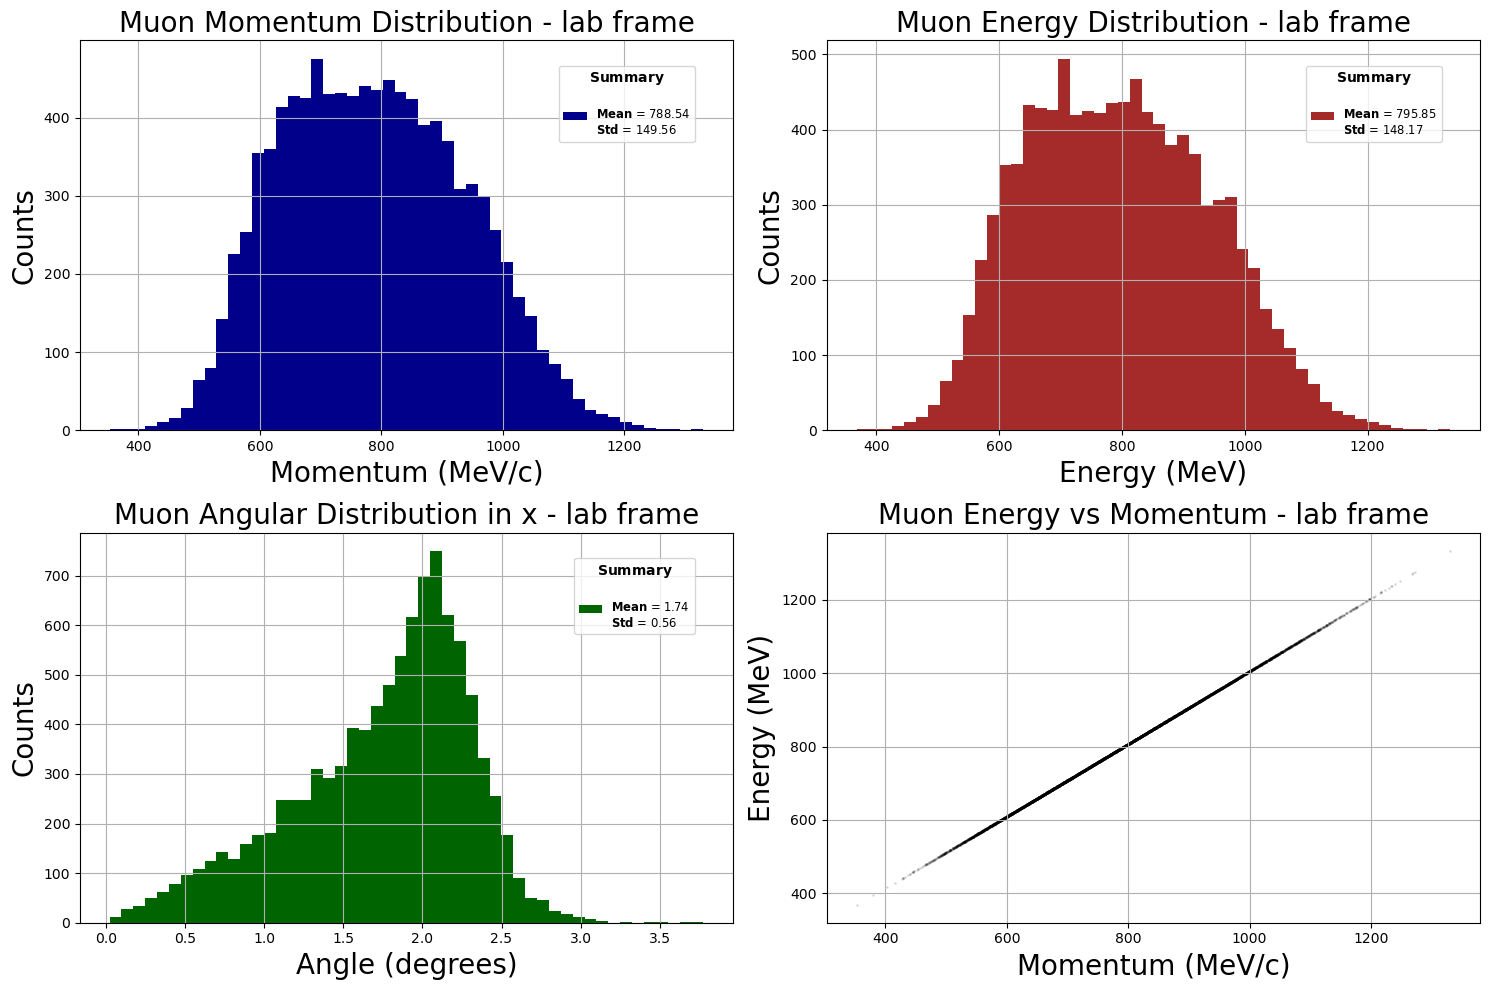

In [6]:
analyze_results(muons_lab)

In [7]:
momentum = np.array([np.linalg.norm(muon.momentum) for muon in muons_lab])
energies = np.array([muon.energy for muon in muons_lab])

In [8]:
energies

array([109.77939564, 109.77939564, 109.77939564, ..., 109.77939564,
       109.77939564, 109.77939564])

In [6]:
a = np.array([1,2,3])
np.sqrt(np.sum(a**2))

3.7416573867739413

In [5]:
np.linalg.norm(a) 

3.7416573867739413